<a href="https://colab.research.google.com/github/ReetikRaj20/Driver_Drowsiness_Detection/blob/main/Drowsiness_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cloning the tensorflow models repository from GitHub
!pip uninstall Cython -y # Temporary fix for "No module named 'object_detection'" error
!git clone --depth 1 https://github.com/tensorflow/models

Found existing installation: Cython 3.0.11
Uninstalling Cython-3.0.11:
  Successfully uninstalled Cython-3.0.11
Cloning into 'models'...
remote: Enumerating objects: 4297, done.
remote: Counting objects: 100% (4297/4297), done.
remote: Compressing objects: 100% (3278/3278), done.
remote: Total 4297 (delta 1208), reused 2176 (delta 947), pack-reused 0 (from 0)
Receiving objects: 100% (4297/4297), 52.92 MiB | 17.20 MiB/s, done.
Resolving deltas: 100% (1208/1208), done.


In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.

In [ ]:
# Modify setup.py file to install the tf-models-official repository targeted at TF v2.8.0
import re
with open('/content/models/research/object_detection/packages/tf2/setup.py') as f:
    s = f.read()

with open('/content/models/research/setup.py', 'w') as f:
    # Set fine_tune_checkpoint path
    s = re.sub('tf-models-official>=2.5.1',
               'tf-models-official==2.8.0', s)
    f.write(s)

In [ ]:
# Installing the Object Detection API (NOTE: This block takes about 10 minutes to finish executing)

# Need to do a temporary fix with PyYAML because Colab isn't able to install PyYAML v5.4.1
!pip install pyyaml==5.3
!pip install /content/models/research/

# Need to downgrade to TF v2.8.0 due to Colab compatibility bug with TF v2.10 (as of 10/03/22)
!pip install tensorflow==2.8.0

# Install CUDA version 11.0 (to maintain compatibility with TF v2.8.0)
!pip install tensorflow_io==0.23.1
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget http://developer.download.nvidia.com/compute/cuda/11.0.2/local_installers/cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
!apt-key add /var/cuda-repo-ubuntu1804-11-0-local/7fa2af80.pub
!apt-get update && sudo apt-get install cuda-toolkit-11-0
!export LD_LIBRARY_PATH=/usr/local/cuda-11.0/lib64:$LD_LIBRARY_PATH

Processing ./models/research
  Preparing metadata (setup.py) ... done
  Using cached tensorflow-2.8.4-cp310-cp310-manylinux2010_x86_64.whl.metadata (2.9 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.8.3-cp310-cp310-manylinux2010_x86_64.whl.metadata (2.9 kB)
  Using cached tensorflow-2.8.2-cp310-cp310-manylinux2010_x86_64.whl.metadata (2.9 kB)
  Using cached tensorflow-2.8.1-cp310-cp310-manylinux2010_x86_64.whl.metadata (2.9 kB)
Using cached tensorflow-2.8.1-cp310-cp310-manylinux2010_x86_64.whl (498.0 MB)
  Created wheel for object_detection: filename=object_detection-0.1-py3-none-any.whl size=1697356 sha256=6596ed63256c7eac880dccfec9cc778ca1415c1c312c4a5db77500ff581106de
  Stored in directory: /tmp/pip-ephem-wheel-cache-65oioudz/wheels/53/dd/70/2de274d6c443c69d367bd6a5606f95e5a6df61aacf1435ec0d
Successfully built object_detection
  Attempting uninstall: o

In [ ]:
# Run Model Bulider Test file, just to verify everything's working properly
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2024-08-21 12:40:20.204062: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0821 12:40:20.596746 140545344766592 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.31s
I0821 12:40:20.846300 140545344766592 test_util.py:2373] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.31s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.53s
I0821 12:40:21.373798 140545344766592 tes

In [ ]:
# Downloading the dataset from RoboFlow

!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="FsWq0mRiVeFb0XQ6DueI")
project = rf.workspace("augmented-startups").project("drowsiness-detection-cntmz")
version = project.version(2)
dataset = version.download("tensorflow")

  Using cached PyYAML-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00
Using cached PyYAML-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (751 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.3
    Uninstalling PyYAML-5.3:
      Successfully uninstalled PyYAML-5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.8.0 requires pyyaml<6.0,>=5.1, but you have pyyaml 6.0.2 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drowsiness-Detection-2 in tensorflow:: 100%|██████████| 1238/1238 [00:00<00:00, 7920.65it/s]


In [ ]:
### This creates a a "labelmap.txt" file with a list of classes the object detection model will detect.
%%bash
cat <<EOF >> /content/labelmap.txt
awake
drowsy
EOF

In [ ]:
# Create TFRecord files
!wget https://raw.githubusercontent.com/Arijit1080/Licence-Plate-Detection-using-TensorFlow-Lite/main/create_tfrecord.py
!python3 create_tfrecord.py --csv_input=/content/Drowsiness-Detection-2/train/_annotations.csv --labelmap=/content/labelmap.txt --image_dir=/content/Drowsiness-Detection-2/train --output_path=train.tfrecord
!python3 create_tfrecord.py --csv_input=/content/Drowsiness-Detection-2/valid/_annotations.csv --labelmap=/content/labelmap.txt --image_dir=/content/Drowsiness-Detection-2/valid --output_path=val.tfrecord

--2024-08-21 12:41:43--  https://raw.githubusercontent.com/Arijit1080/Licence-Plate-Detection-using-TensorFlow-Lite/main/create_tfrecord.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4414 (4.3K) [text/plain]
Saving to: ‘create_tfrecord.py.1’

create_tfrecord.py. 100%[===================>]   4.31K  --.-KB/s    in 0s      

2024-08-21 12:41:43 (76.2 MB/s) - ‘create_tfrecord.py.1’ saved [4414/4414]

Successfully created the TFRecords: /content/train.tfrecord
Successfully created the TFRecords: /content/val.tfrecord


In [ ]:
import pandas as pd
df=pd.read_csv('/content/Drowsiness-Detection-2/valid/_annotations.csv')
df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,GOPR0492_MP4-12_jpg.rf.00913202eaf6b58ca105d0e...,416,416,awake,171,121,285,289
1,GOPR0492_MP4-219_jpg.rf.09e36156f719f94a63b610...,416,416,drowsy,183,178,252,275
2,GOPR0492_MP4-471_jpg.rf.078ec0470a384d81292360...,416,416,awake,155,180,226,267
3,GOPR0492_MP4-18_jpg.rf.0642b97fbcab6b2dcab24aa...,416,416,awake,171,172,242,278
4,GOPR0492_MP4-166_jpg.rf.294fcb1f353d4820a0064b...,416,416,drowsy,167,169,239,282
...,...,...,...,...,...,...,...,...
98,GOPR0492_MP4-486_jpg.rf.f5608b5af99eb65179fd77...,416,416,awake,181,181,254,266
99,GOPR0492_MP4-357_jpg.rf.8552a19c91cf132992e6bf...,416,416,drowsy,142,185,223,272
100,GOPR0492_MP4-214_jpg.rf.fd9fff1f3345dc08d17858...,416,416,awake,176,174,242,268
101,GOPR0492_MP4-298_jpg.rf.e366845186130df71e3894...,416,416,drowsy,171,173,250,302


In [ ]:
# Creating XML file for each images in test directory, which will be later used in calculating the accuracy score
import csv
import pandas as pd
import numpy as np
f = open('/content/Drowsiness-Detection-2/test/_annotations.csv')
csv_f = csv.reader(f)
data = []

for row in csv_f:
   data.append(row)
f.close()

print(data[1:][5][0])

GOPR0492_MP4-380_jpg.rf.4c8fa275d2657023d7b55f9920d1e21b.jpg


In [ ]:
# Changing directory to test directory to store all images's XML file
%cd /content/Drowsiness-Detection-2/test

/content/Drowsiness-Detection-2/test


In [ ]:
!pwd

/content/Drowsiness-Detection-2/test


In [ ]:
# This creates an XML file using the data read from the _annotaions.csv file in test folder for individual test images

# This function give a string representing the data as it look like in XML file
i=0
def convert_row(row):
    return """<annotation>
            <folder>Unkown</folder>
                        <filename>%s</filename>
                        <path>Unknown</path>
                        <source>
                                <database>Unknown</database>
                        </source>
                        <size>
                             <width>%s</width>
                             <height>%s</height>
                             <depth>3</depth>
                        </size>
                        <segmented>0</segmented>
                        <object>
                            <name>%s</name>
                            <pose>Unspecified</pose>
                            <truncated>0</truncated>
                            <difficult>0</difficult>
                            <bndbox>
                                <xmin>%s</xmin>
                                <ymin>%s</ymin>
                                <xmax>%s</xmax>
                                <ymax>%s</ymax>
                            </bndbox>
                        </object>
</annotation>""" % (row[0], row[1], row[2], row[3], row[4], row[5], row[6],row[7])


# This function creates a XML file with the same name as the image
def converttoxml(filename,i):
    x = data[1:][i][0]
    x = x[:-3]
    x = x + "xml"
    with open(x, 'w') as myfile:
        myfile.write(filename)

for i in range(70):
    converttoxml(convert_row(data[1:][i]),i)



In [ ]:
train_record_fname = '/content/train.tfrecord'
val_record_fname = '/content/val.tfrecord'
label_map_pbtxt_fname = '/content/labelmap.pbtxt'

In [ ]:
# Mentioning the model name that I am going to use to train my dataset
model_name = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
pretrained_checkpoint = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
base_pipeline_file = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config'

In [ ]:
# Downloading the model from github and storing it into a different folder
%mkdir /content/models/mymodel/
%cd /content/models/mymodel/

import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint
!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

/content/models/mymodel
--2024-08-21 12:45:53--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.24.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  9.97MB/s    in 2.0s    

2024-08-21 12:45:55 (9.97 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

--2024-08-21 12:45:55--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199

In [ ]:
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

--2024-08-21 12:45:59--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4684 (4.6K) [text/plain]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config.1’

ssd_mobilenet_v2_fp 100%[===================>]   4.57K  --.-KB/s    in 0s      

2024-08-21 12:45:59 (86.1 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config.1’ saved [4684/4684]



In [ ]:
num_steps = 30000
batch_size = 16

In [ ]:
# Defining the pipeline file name and checkpoint path
pipeline_fname = '/content/models/mymodel/' + base_pipeline_file
fine_tune_checkpoint = '/content/models/mymodel/' + model_name + '/checkpoint/ckpt-0'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)
print('Total classes:', num_classes)

Total classes: 2


In [ ]:
pipeline_file = '/content/models/mymodel/pipeline_file.config'
model_dir = '/content/training/'

In [ ]:
#  Creating a custom pipeline file by subtituting the data from the original pipeline config file
import re

%cd /content/models/mymodel
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()
with open('pipeline_file.config', 'w') as f:

    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(val_record_fname), s)

    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)

    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)

    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)

    s = re.sub('learning_rate_base: .8','learning_rate_base: .08', s)

    s = re.sub('warmup_learning_rate: 0.13333','warmup_learning_rate: .026666', s)

    f.write(s)

/content/models/mymodel
writing custom configuration file


In [ ]:
# Run training!
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

In [ ]:
# saving the output file of the model into a custom directory
!mkdir /content/custom_model_lite
output_directory = '/content/custom_model_lite'

last_model_path = '/content/training'

!python /content/models/research/object_detection/export_tflite_graph_tf2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}

2024-08-21 14:35:27.679131: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0821 14:35:31.472990 136631325950592 api.py:441] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0821 14:35:36.612827 136631325950592 api.py:441] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
2024-08-21 14:35:38.370752: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
I0821 14:35:38.986778 136631325950592 api.py:441] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
W0821 14:35:40.254358 136631325950592 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7c434a942e60>, because it is not built.
W0821 14:35:40.494774

In [ ]:
# Converting the model into tflite model, that can be exported and used for inference
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/content/custom_model_lite/saved_model')
tflite_model = converter.convert()

with open('/content/custom_model_lite/detectdrowsyawake.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
%cd /content/models

/content/models


In [ ]:
# Download mAP for measuring accuracy
%%bash
git clone https://github.com/Cartucho/mAP /content/mAP
cd /content/mAP
rm input/detection-results/*
rm input/ground-truth/*
rm input/images-optional/*
wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/calculate_map_cartucho.py

Cloning into '/content/mAP'...
--2024-08-21 14:38:29--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/calculate_map_cartucho.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5397 (5.3K) [text/plain]
Saving to: ‘calculate_map_cartucho.py’

     0K .....                                                 100% 76.5M=0s

2024-08-21 14:38:29 (76.5 MB/s) - ‘calculate_map_cartucho.py’ saved [5397/5397]



In [ ]:
!cp /content/Drowsiness-Detection-2/test/* /content/mAP/input/images-optional # Copy images and xml files into mAP folder
!mv /content/mAP/input/images-optional/*.xml /content/mAP/input/ground-truth/  # Move xml files to the appropriate folder

In [ ]:
!python /content/mAP/scripts/extra/convert_gt_xml.py

Conversion completed!


In [ ]:
# Setting up variables for running inference
PATH_TO_IMAGES='/content/Drowsiness-Detection-2/test'
PATH_TO_MODEL='/content/custom_model_lite/detectdrowsyawake.tflite'
PATH_TO_LABELS='/content/labelmap.txt'
PATH_TO_RESULTS='/content/mAP/input/detection-results'
min_conf_threshold=0.5

# Using all the images in the test folder
image_list = glob.glob(PATH_TO_IMAGES + '/*.jpg') + glob.glob(PATH_TO_IMAGES + '/*.JPG') + glob.glob(PATH_TO_IMAGES + '/*.png') + glob.glob(PATH_TO_IMAGES + '/*.bmp')
images_to_test = min(500, len(image_list))

# Telling function to just save results and not display images
txt_only = True

# Running inferencing function!
print('Starting inference on %d images...' % images_to_test)
tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test, PATH_TO_RESULTS, txt_only)
print('Finished inferencing!')

Starting inference on 71 images...
Finished inferencing!


In [ ]:
# Displaying the output of mAP
%cd /content/mAP
!python calculate_map_cartucho.py --labels=/content/labelmap.txt --outdir=/output3

/content/mAP
Calculating mAP at 0.50 IoU threshold...
89.90% = awake AP 
81.14% = drowsy AP 
mAP = 85.52%
Calculating mAP at 0.55 IoU threshold...
89.90% = awake AP 
81.14% = drowsy AP 
mAP = 85.52%
Calculating mAP at 0.60 IoU threshold...
89.90% = awake AP 
81.14% = drowsy AP 
mAP = 85.52%
Calculating mAP at 0.65 IoU threshold...
89.90% = awake AP 
81.14% = drowsy AP 
mAP = 85.52%
Calculating mAP at 0.70 IoU threshold...
89.90% = awake AP 
81.14% = drowsy AP 
mAP = 85.52%
Calculating mAP at 0.75 IoU threshold...
89.90% = awake AP 
81.14% = drowsy AP 
mAP = 85.52%
Calculating mAP at 0.80 IoU threshold...
89.90% = awake AP 
81.14% = drowsy AP 
mAP = 85.52%
Calculating mAP at 0.85 IoU threshold...
87.65% = awake AP 
81.14% = drowsy AP 
mAP = 84.39%
Calculating mAP at 0.90 IoU threshold...
79.97% = awake AP 
71.63% = drowsy AP 
mAP = 75.80%
Calculating mAP at 0.95 IoU threshold...
4.45% = awake AP 
11.24% = drowsy AP 
mAP = 7.85%

***mAP Results***

Class		Average mAP @ 0.5:0.95
---------

In [ ]:
import os
import cv2
import numpy as np
import sys
import glob
import random
import importlib.util
from tensorflow.lite.python.interpreter import Interpreter

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

def tflite_detect_images(modelpath, imgpath, lblpath, min_conf=0.5, num_test_images=10, savepath='/content/results', txt_only=False):

  images = glob.glob(imgpath + '/*.jpg') + glob.glob(imgpath + '/*.JPG') + glob.glob(imgpath + '/*.png') + glob.glob(imgpath + '/*.bmp')
  with open(lblpath, 'r') as f:
      labels = [line.strip() for line in f.readlines()]

  interpreter = Interpreter(model_path=modelpath)
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()
  height = input_details[0]['shape'][1]
  width = input_details[0]['shape'][2]


  float_input = (input_details[0]['dtype'] == np.float32)

  input_mean = 127.5
  input_std = 127.5

  images_to_test = random.sample(images, num_test_images)

  for image_path in images_to_test:

      image = cv2.imread(image_path)
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      imH, imW, _ = image.shape
      image_resized = cv2.resize(image_rgb, (width, height))
      input_data = np.expand_dims(image_resized, axis=0)

      if float_input:
          input_data = (np.float32(input_data) - input_mean) / input_std

      interpreter.set_tensor(input_details[0]['index'],input_data)
      interpreter.invoke()

      boxes = interpreter.get_tensor(output_details[1]['index'])[0]
      # Bounding box coordinates of detected objects
      classes = interpreter.get_tensor(output_details[3]['index'])[0]
      # Class index of detected objects
      scores = interpreter.get_tensor(output_details[0]['index'])[0]
      # Confidence of detected objects

      detections = []

      for i in range(len(scores)):
          if ((scores[i] > min_conf) and (scores[i] <= 1.0)):

              ymin = int(max(1,(boxes[i][0] * imH)))
              xmin = int(max(1,(boxes[i][1] * imW)))
              ymax = int(min(imH,(boxes[i][2] * imH)))
              xmax = int(min(imW,(boxes[i][3] * imW)))

              cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (10, 255, 0), 2)

              object_name = labels[int(classes[i])] # Look up object name from "labels" array using class index
              label = '%s: %d%%' % (object_name, int(scores[i]*100)) # Example: 'person: 72%'
              labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2) # Get font size
              label_ymin = max(ymin, labelSize[1] + 10) # Make sure not to draw label too close to top of window
              cv2.rectangle(image, (xmin, label_ymin-labelSize[1]-10), (xmin+labelSize[0], label_ymin+baseLine-10), (255, 255, 255), cv2.FILLED) # Draw white box to put label text in
              cv2.putText(image, label, (xmin, label_ymin-7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2) # Draw label text

              detections.append([object_name, scores[i], xmin, ymin, xmax, ymax])


      if txt_only == False:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8,8))
        plt.imshow(image)
        plt.show()

      elif txt_only == True:

        image_fn = os.path.basename(image_path)
        base_fn, ext = os.path.splitext(image_fn)
        txt_result_fn = base_fn +'.txt'
        txt_savepath = os.path.join(savepath, txt_result_fn)

        with open(txt_savepath,'w') as f:
            for detection in detections:
                f.write('%s %.4f %d %d %d %d\n' % (detection[0], detection[1], detection[2], detection[3], detection[4], detection[5]))

  return

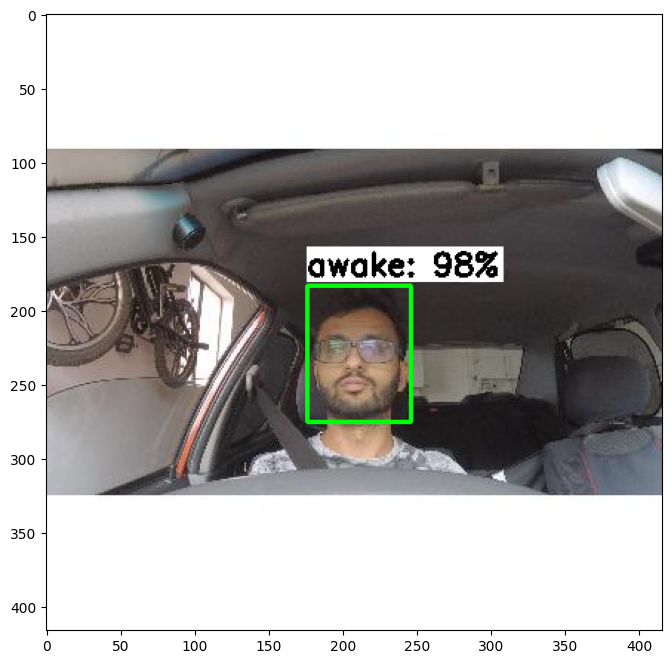

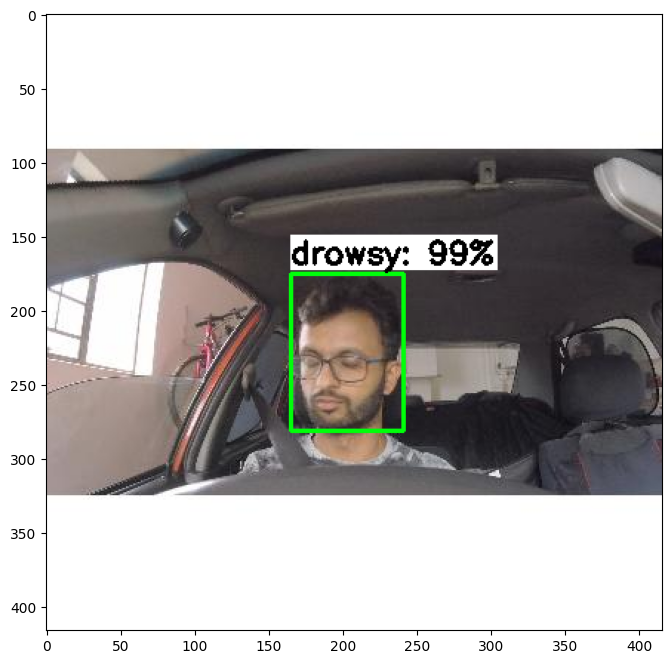

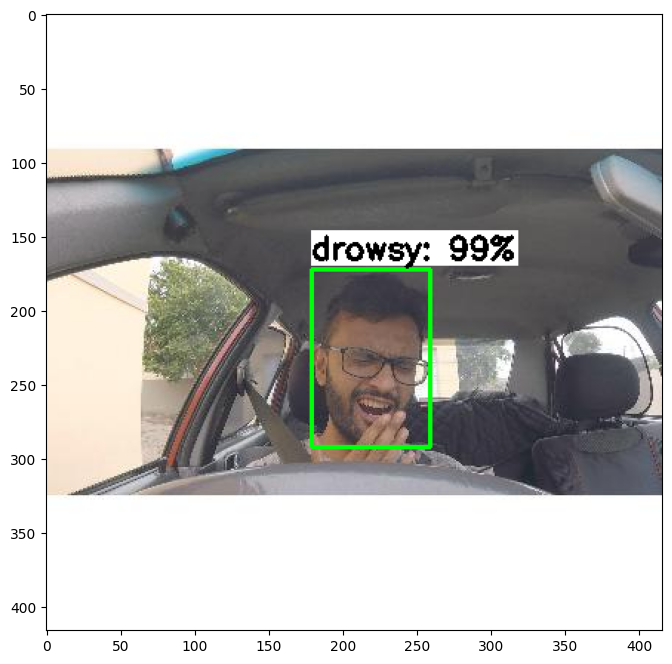

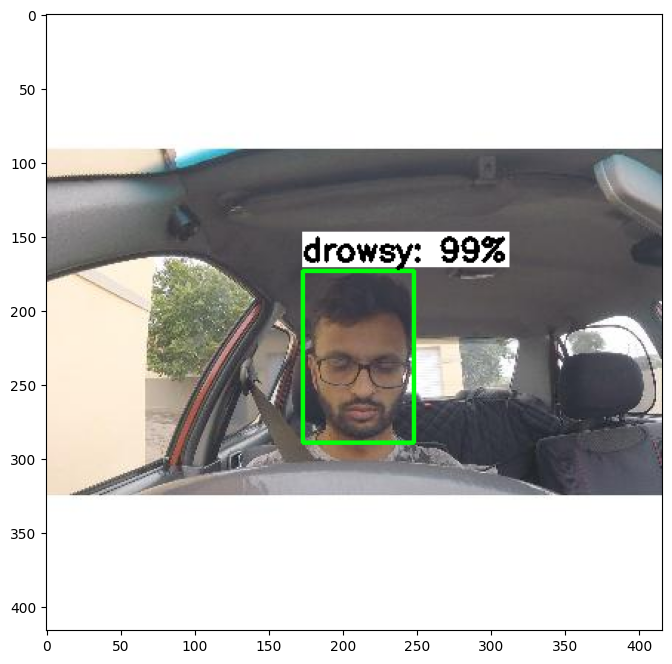

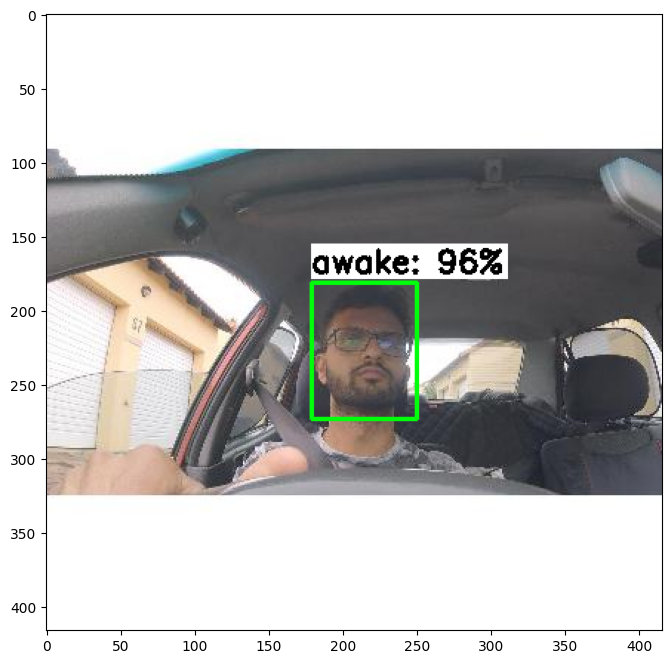

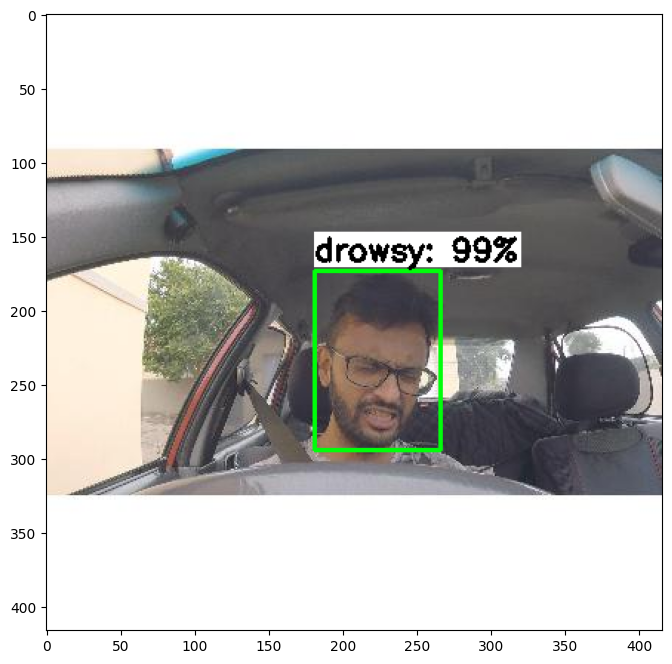

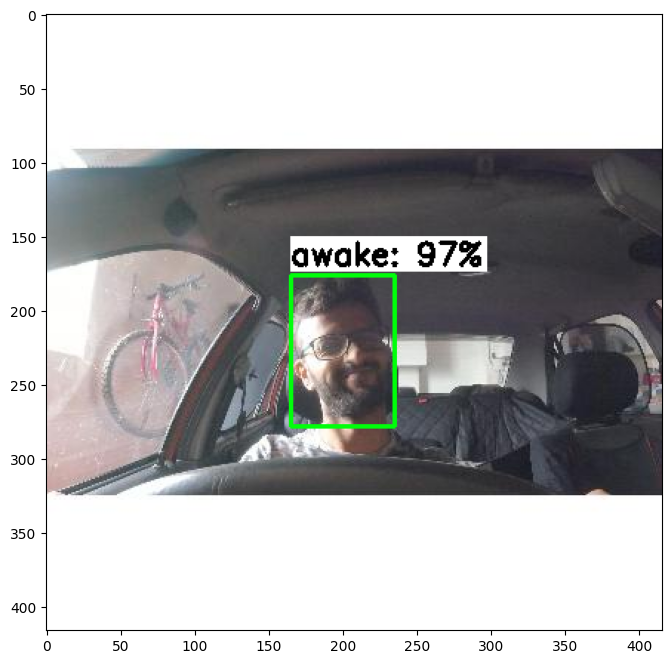

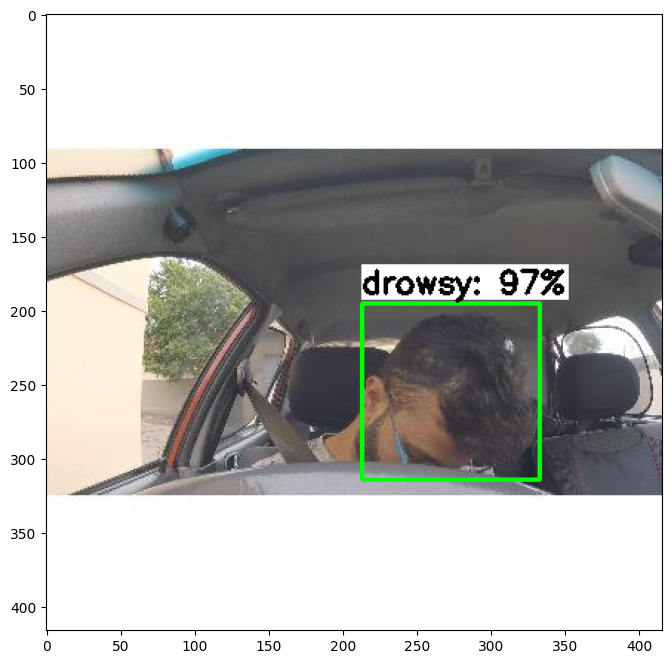

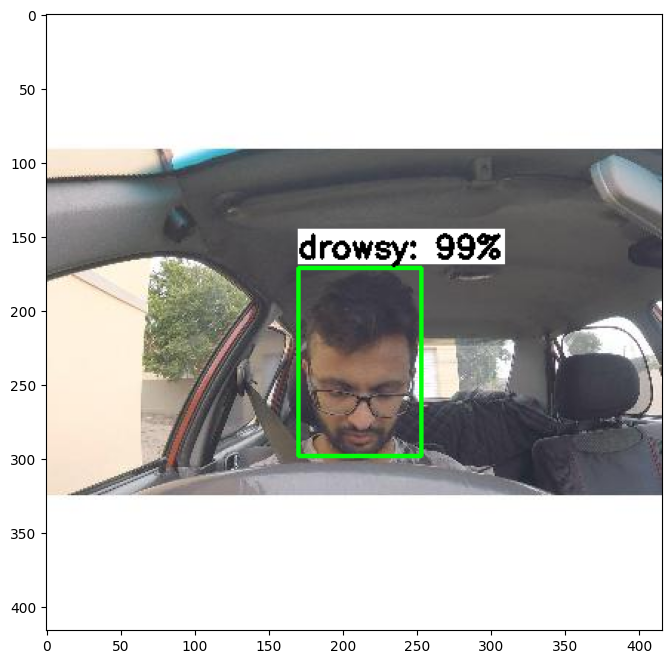

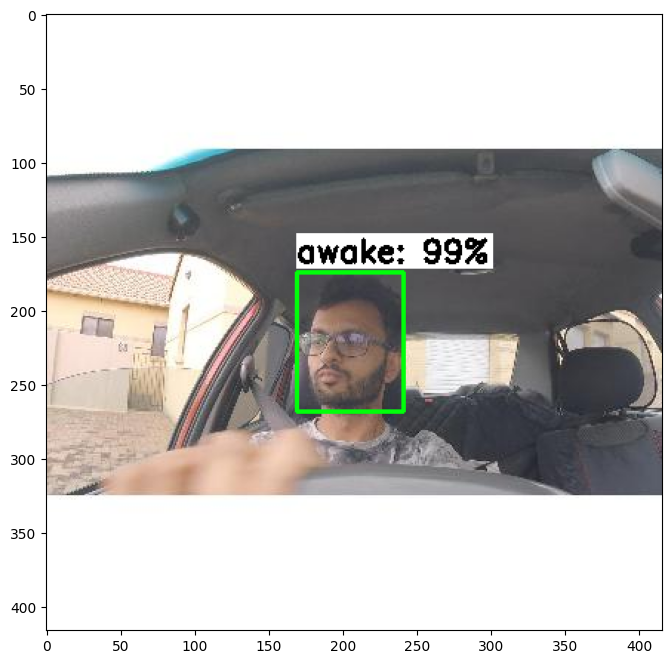

In [ ]:
# Running Inference in test images
PATH_TO_IMAGES='/content/Drowsiness-Detection-2/test'
PATH_TO_MODEL='/content/custom_model_lite/detectdrowsyawake.tflite'
PATH_TO_LABELS='/content/labelmap.txt'
min_conf_threshold=0.8
images_to_test = 10

tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test)